In [9]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp
from decimal import Decimal, getcontext

# Actividad 03: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Leonardo Ortega Trujillo
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

-------------------------------------------------
#**Solucion**

In [22]:
# Aqui va su código
getcontext().prec = 1000

def funcion_seno(x,N):
  #esta funcion calcula el valor de la funcion seno para un valor x y unas n iteraciones usando la serie de taylor
  N = int(N)
  seno = 0
  for n in range(N):

    valor = ((-1)**n) * ((x**(2*n+1))) / (math.factorial(2*n+1))
    seno += valor

  return seno

In [30]:
# Epsilon de la máquina para float32
epsilon_float32 = np.finfo(np.float32).eps
print(f"Epsilon de la máquina (float32): {epsilon_float32}")

# Epsilon de la máquina para float64
epsilon_float64 = np.finfo(np.float64).eps
print(f"Epsilon de la máquina (float64): {epsilon_float64}",'\n')

x = math.pi/2
N = 83
print(f'valores del sen(x) usando math.sin(x): {math.sin(x)}, y usando la serie de taylor: {funcion_seno(x,N)}','\n')

x_32 = np.float32(x)
x_64 = np.float64(x)

#b)
error_absoluto_32 = abs(math.sin(x_32) - funcion_seno(x_32,N))
print(f'El error absoluto en 32bits es: {error_absoluto_32}. Los valores con este nuevo x_32 para math.sin(x_32): {math.sin(x_32)}, y usando la serie: {funcion_seno(x_32,N)}')

#c)
error_absoluto_64 = abs(math.sin(x_64) - funcion_seno(x_64,N))
print(f'El error absoluto en 64bits es: {error_absoluto_64}. Los valores con este nuevo x_32 para math.sin(x_32): {math.sin(x_64)}, y usando la serie: {funcion_seno(x_64,N)}\n')
print('Ambos errores absolutos de 32bits y 64bits son menores o iguales al epsilon de la maquina \n')

#error porcentual
error_porcentual_32 = (abs(math.sin(x_32) - funcion_seno(x_32,N))/abs(math.sin(x_32))) * 100
error_porcentual_64 = (abs(math.sin(x_64) - funcion_seno(x_64,N))/abs(math.sin(x_64))) * 100

print(f'Los errores porcentuales para 32bits y 64bits son, respectivamente: {error_porcentual_32}, {error_porcentual_64}')

Epsilon de la máquina (float32): 1.1920928955078125e-07
Epsilon de la máquina (float64): 2.220446049250313e-16 

valores del sen(x) usando math.sin(x): 1.0, y usando la serie de taylor: 1.0000000000000002 

El error absoluto en 32bits es: 1.1102230246251565e-16. Los valores con este nuevo x_32 para math.sin(x_32): 0.999999999999999, y usando la serie: 0.9999999999999991
El error absoluto en 64bits es: 2.220446049250313e-16. Los valores con este nuevo x_32 para math.sin(x_32): 1.0, y usando la serie: 1.0000000000000002

Ambos errores absolutos de 32bits y 64bits son menores o iguales al epsilon de la maquina 

Los errores porcentuales para 32bits y 64bits son, respectivamente: 1.1102230246251578e-14, 2.220446049250313e-14


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

------------------------------------------------------------------------------
#**Solucion:**

Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

In [31]:
# Aqui va su código
def exponencial_inversa(x,N):
  exp = 0
  for n in range(N):
    exp += ((-1)**n) * x**n/math.factorial(n)

  return exp

def exp_abs(x, tol=1e-7):
    suma = 0
    n = 0
    term = 1
    suma += term

    while True:
        n += 1
        term = (-x)**n / math.factorial(n)
        suma += term

        if abs((-x)**(n+1) / math.factorial(n+1)) <= abs(tol * suma):
            break

    return n

X_exponencial = 0.5
N_exp = 80
print(f'El n necesario para que se cumpla la condicion con el x evaluado es: {exp_abs(X_exponencial)}')

valor_exacto = np.exp(X_exponencial)
error_relativo = abs((valor_exacto - exponencial_inversa(X_exponencial,N_exp))/valor_exacto)
print(f'El error relativo de las dos funciones es: {error_relativo}')

El n necesario para que se cumpla la condicion con el x evaluado es: 8
El error relativo de las dos funciones es: 0.6321205588285578


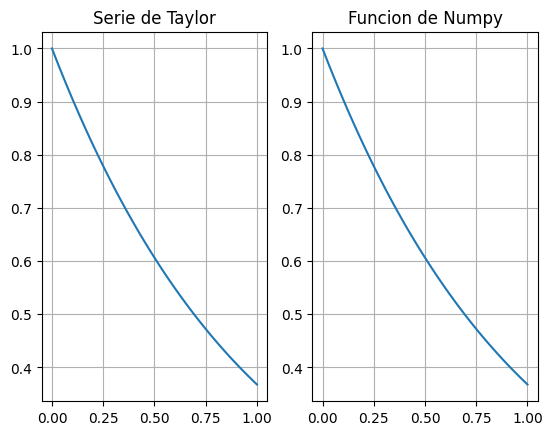

In [5]:
#se observa que ambas funciones tienen la misma forma
x_exp = np.linspace(0,1,100)
N_exp = 100
valores_exp = []
for i in range(len(x_exp)):
  valores_exp.append(exponencial_inversa(x_exp[i],N_exp))

fig, axs = plt.subplots(1,2)
axs[0].plot(x_exp,valores_exp)
axs[0].set_title('Serie de Taylor')
axs[0].grid()

axs[1].plot(x_exp,1/np.exp(x_exp))
axs[1].set_title('Funcion de Numpy')
axs[1].grid()

plt.show()

--------------------------------------
##b.
Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

In [6]:
X_exponencial_10 = 10
N_exp = 80

exponencial_inversa(X_exponencial_10,N_exp)

4.5399929433607724e-05

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

----------------------------------------------
#**Solucion**
a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$

In [7]:
# Aqui va su código
##a)
def cancel_sust_1(N):
  sum = 0
  for n in range(1,2*(N)+1):
    sum += ((-1)**n)*(n/(n+1))

  return sum

def cancel_sust_2(N):
  sum_1 = 0
  sum_2 = 0

  for n in range(1,N+1):
    sum_1 += ((2*n)-1)/(2*n)
    sum_2 += (2*n)/(2*n+1)

  sum_T = -sum_1 + sum_2
  return sum_T

def cancel_sust_3(N):
  suma = 0
  for n in range(1,N+1):
    suma += 1/((2*n)*((2*n) +1))

  return suma

In [78]:
#valores para un N grande de cada suma
N_max = 10**6
cancel_sust_1(N_max),cancel_sust_2(N_max),cancel_sust_3(N_max)

(0.3068525694401464, 0.30685257457662374, 0.306852569440241)

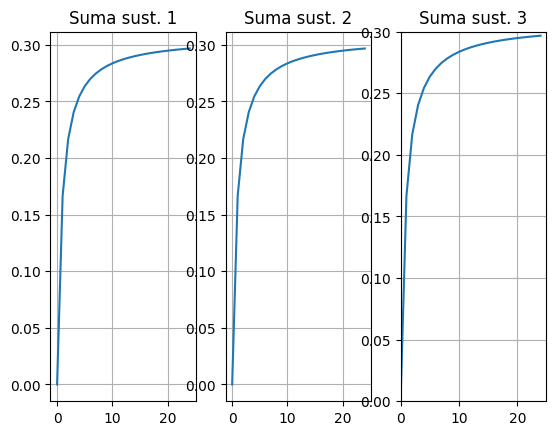

In [77]:
#comportamiento de las 3 sumas, se observa una convergencia similar en cada una
suma_1 = []
suma_2 = []
suma_3 = []

n_max = 25
for i in range(n_max):
  cancel_sust_1(i)
  cancel_sust_2(i)
  cancel_sust_3(i)
  suma_1.append(cancel_sust_1(i))
  suma_2.append(cancel_sust_2(i))
  suma_3.append(cancel_sust_3(i))

fig, axs = plt.subplots(1,3)

axs[0].plot(range(n_max),suma_1)
axs[0].set_title('Suma sust. 1')
axs[0].grid()
axs[1].plot(range(n_max),suma_2)
axs[1].set_title('Suma sust. 2')
axs[1].grid()
axs[2].plot(range(n_max),suma_3)
axs[2].set_title('Suma sust. 3')
axs[2].grid()

plt.xlim(0,25)
plt.ylim(0,0.30)
plt.show()

In [83]:
#calculo de los errores
def error(Si, S3):
    return abs((Si - S3) / S3)

N_values = np.logspace(1, 6, num=100, dtype=int)

error_S1 = []
error_S2 = []
type(error_S1)

list

In [84]:
for N in N_values:
    S1_N = cancel_sust_1(N)
    S2_N = cancel_sust_2(N)
    S3_N = cancel_sust_3(N)  # Solución exacta

    err_S1 = error(S1_N, S3_N)
    err_S2 = error(S2_N, S3_N)

    error_S1.append(err_S1)
    error_S2.append(err_S2)

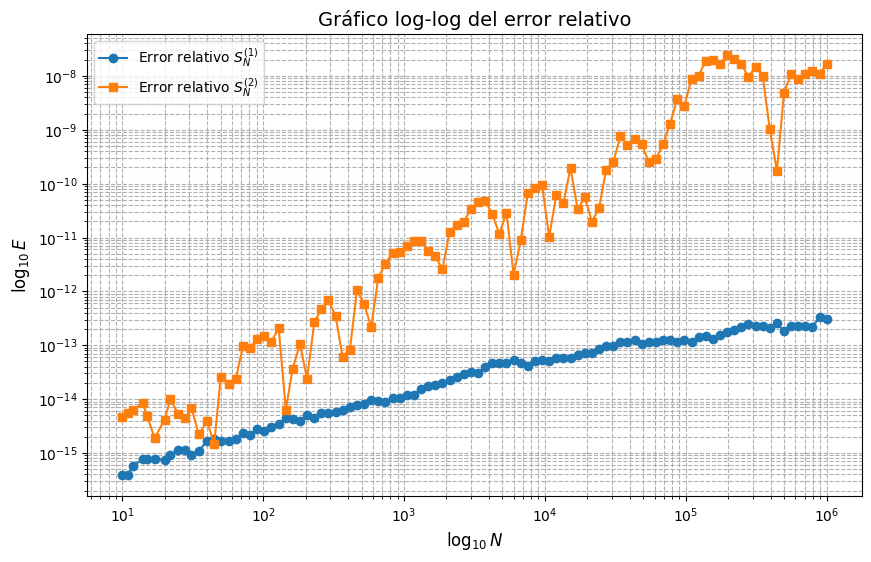

In [86]:
plt.figure(figsize=(10,6))

#error de S_1
plt.loglog(N_values, error_S1, label=r'Error relativo $S_N^{(1)}$', marker='o')
#error de S_2
plt.loglog(N_values, error_S2, label=r'Error relativo $S_N^{(2)}$', marker='s')

plt.xlabel(r'$\log_{10} N$', fontsize=12)
plt.ylabel(r'$\log_{10} E$', fontsize=12)
plt.title('Gráfico log-log del error relativo', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="--")